# Exploratory Data Analysis

_April 14 2025 | Chen Kai Zhang | 014806701_

## Introduction

Having been involved in the stock market for years and recently diving into high-frequency trading, I'm interested in understanding the relation between stock prices and common economic indicators. Through this deeper understanding, I look to become more confident and improve on my investment strategies.

## Data

**Source** : [Kaggle NASDAQ Dataset](https://www.kaggle.com/datasets/sai14karthik/nasdq-dataset)

**Author** : Sai Karthik

**Data Collection** :

Data was extracted by fetching from popular and reputable financial APIs and databases :

- **Yahoo Finance** : historical stock prices
- **Federal Reserve Economic Data (FRED)** : economic indicators (interest rates, VIX, etc)
- **Alpha Vantage** : gold and oil prices

... therefore I would assume a script was developed to iterate through each stock price from Yahoo Finance and append the corresponding day data from FRED and Alpha Vantage.

**Units of Observation** : 

Each row in the dataset is the statistic of each feature at a specific date locatable in the `date` column in the form YYY-MM-DD.

**Variables/Features**

The bolded features are the main ones I'm interest in, but I will be observing all of them

- **Date : date format in YYYY-MM-DD (string)**
- **Open : price stock opened at (float USD)**
- **Close : price stock closed at (float USD)**
- **High : highest price stock achieved (float USD)**
- **Low : lowest price stock achieved (float USD)**
- **Volume : shares traded (.00 float)**
- **Interest Rate : prevailing interest rate (float)**
- Exchange Rate : exchange rate for USD against other currencies (float)
- **VIX : measure of market risk (float)**
- Gold : gold price (float USD)
- Oil : oil price (float USD)
- TED Spread : banking system credit risk (float)
- EFFR : interest rates between depository institutions (float)

**Data Cleanup**

As described in the **Project Proposal**, the only cleanup done to the dataset was capping the outlier values based on a lower and upper bound defined by the inter-quartile range (IQR).

```python
    numeric_cols = nasdaq_df.select_dtypes(['float64']).columns

    Q1 = nasdaq_df[numeric_cols].quantile(0.25)
    Q3 = nasdaq_df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    limits = pd.DataFrame({'lower_limit': lower_bound, 'upper_limit': upper_bound})

    # Capping outliers
    for col in numeric_cols:
        nasdaq_df.loc[nasdaq_df[col] < limits.loc[col, 'lower_limit'], col] = limits.loc[col, 'lower_limit']
        nasdaq_df.loc[nasdaq_df[col] > limits.loc[col, 'upper_limit'], col] = limits.loc[col, 'upper_limit']

    show_outliers(nasdaq_df.select_dtypes(['float64']))
```

The code snippet above demonstrates how it is done:

1. Calculate the IQR $Q3 - Q1$ (for each column)
2. Find the lower and upper bounds using the IQR (for each column)
3. Go through each column and cap the outliers

## Exploratory Data Analysis

From **Project Proposal**, I introduced the following questions I had for the [Kaggle NASDAQ Dataset](https://www.kaggle.com/datasets/sai14karthik/nasdq-dataset):

1. What is the relationship between stock price, trading volume, VIX, and interest rates?
2. If a relationship exists, is there a discernible pattern in price movements based on those indicators?
3. How do other features included in the dataset influence stock price?
4. Given one of the 4 FOI, is it possible to predict its impact on any of the other FOI?

In the code below, I will attempt to answer those questions.

In [2]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Setting up dataset as DataFrame

dataset_path = "./datasets/nasdaq.csv"

nasdaq_df = pd.read_csv(dataset_path)
nasdaq_df.head()

,Date,Open,High,Low,Close,Volume,InterestRate,ExchangeRate,VIX,TEDSpread,EFFR,Gold,Oil
0,2010-01-04,6.640000,6.810000,6.633333,6.746667,6514500.0,0.11,1.4419,20.04,0.17,0.12,1117.699951,81.510002
1,2010-01-05,6.643333,6.773333,6.643333,6.766667,4445100.0,0.11,1.4402,19.35,0.18,0.12,1118.099976,81.769997
2,2010-01-06,6.733333,6.786667,6.720000,6.763333,7340100.0,0.11,1.4404,19.16,0.19,0.12,1135.900024,83.180000
3,2010-01-07,6.750000,6.766667,6.630000,6.673333,8498400.0,0.11,1.4314,19.06,0.20,0.10,1133.099976,82.660004
4,2010-01-08,6.676667,6.766667,6.626667,6.743333,4347600.0,0.11,1.4357,18.13,0.20,0.11,1138.199951,82.750000


### 1. What is the relationship between stock proce, trading volume, VIX, and interest rates?

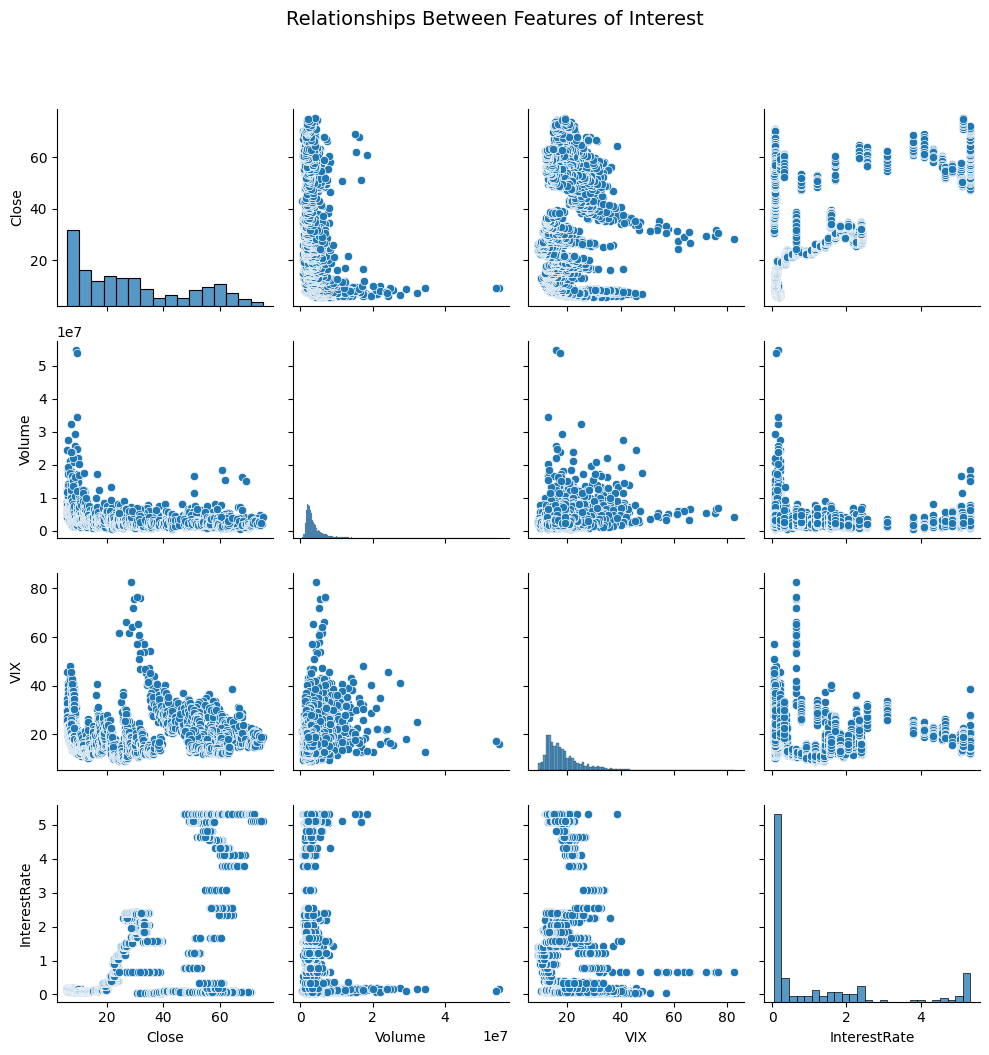

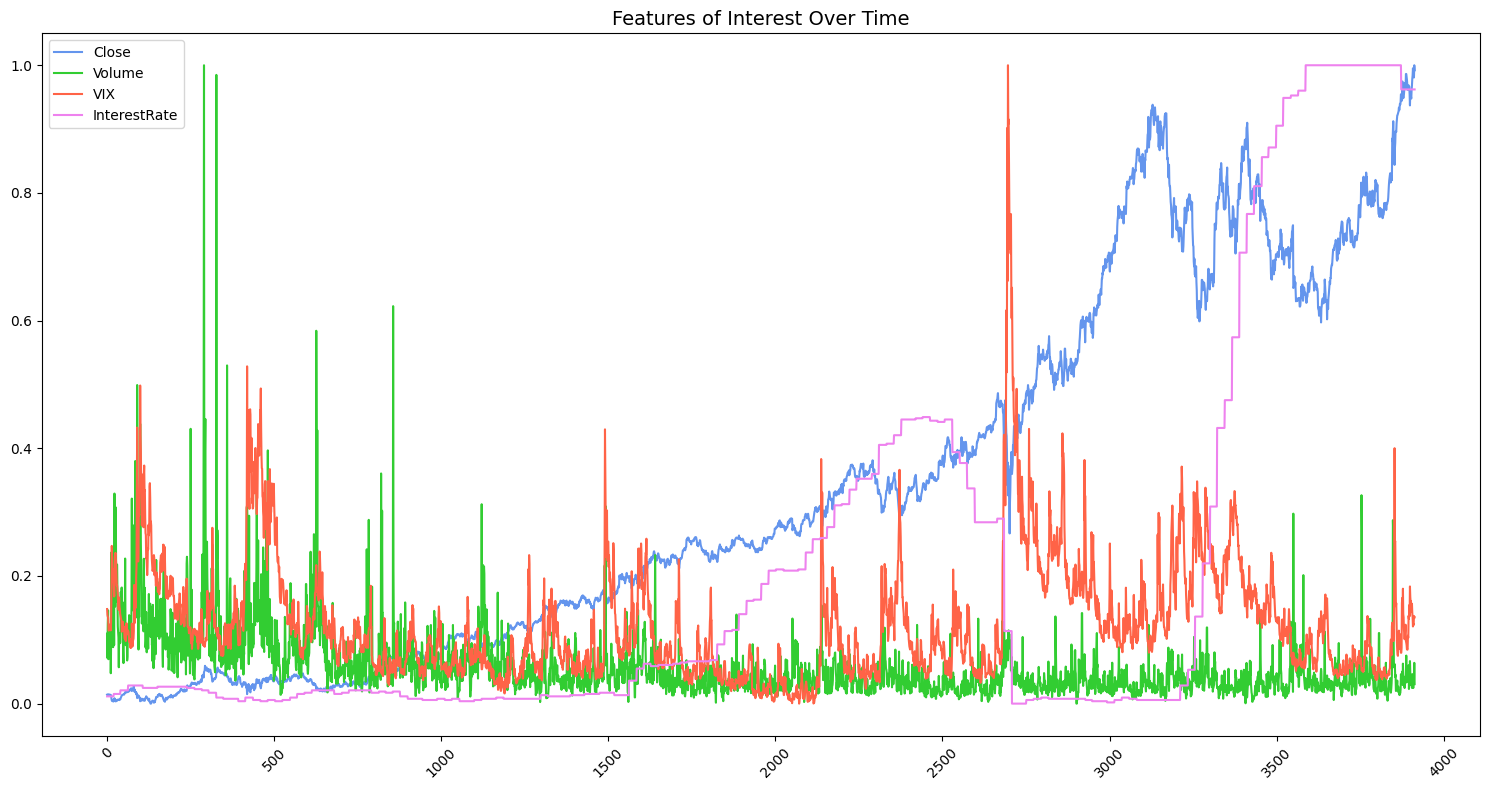

In [62]:
key_columns = ["Close", "Volume", "VIX", "InterestRate"]
colors = ["cornflowerblue", "limegreen", "tomato", "violet"]

pair_plot = sns.pairplot(nasdaq_df[key_columns])
pair_plot.figure.suptitle("Relationships Between Features of Interest", fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

nasdaq_norm_df = nasdaq_df[key_columns].copy()

for column in key_columns:
    nasdaq_norm_df[column] = (nasdaq_df[column] - nasdaq_df[column].min()) / (nasdaq_df[column].max() - nasdaq_df[column].min())

plt.figure(figsize=(15,8))
for key, color in zip(key_columns, colors):
    plt.plot(nasdaq_norm_df.index, nasdaq_norm_df[key], label=key, color=color, linewidth=1.5)

plt.title("Features of Interest Over Time", fontsize=14)
plt.legend(loc="upper left")
plt.xticks(rotation=45)  # Rotate x-axis labels


plt.tight_layout()
plt.show()

To start, I would like to preface that when I state **"stock price"**, I technically mean the `Close` column from the dataset. There is no deep meaning behind why I chose to use `Close` to define the stock price, but from the observations made in **Project Proposal**, the 4 feature columns:

1. Open
2. Close
3. High
4. Low

... have such a high correlation (1), that using them interchangeably for this observation would not result in different observations.

From the two graphs generated by the code above, I came to the following observations:

1. The stock price has little relationship between our feature of interests, other than with the interest rate. Although the relationship is not very strong, it is quite visible from the two graph that as interest rate increases, the stock prices tend to hover at and between higher values.
2. All other features of interests do not show any strong signs of relationship between one another.

Therefore, from the graphs and my observations, the stock price seems to be very independent and not easily swayed by common economical indicators like VIX and Volume.

### 2. If a relationship exists, is there a discernible pattern in price movements based on those indicators?

From the observations done to answever **Question 1.**, there is no discernible pattern in price movements based on common economical indicators. The only thing I could say and to be honest not even rely on, is that when interest goes up, so does the stock price so maybe be more bullish on NASDAQ's price as interest rates increases.

### 3. How do other features included in the dataset influence stock price?

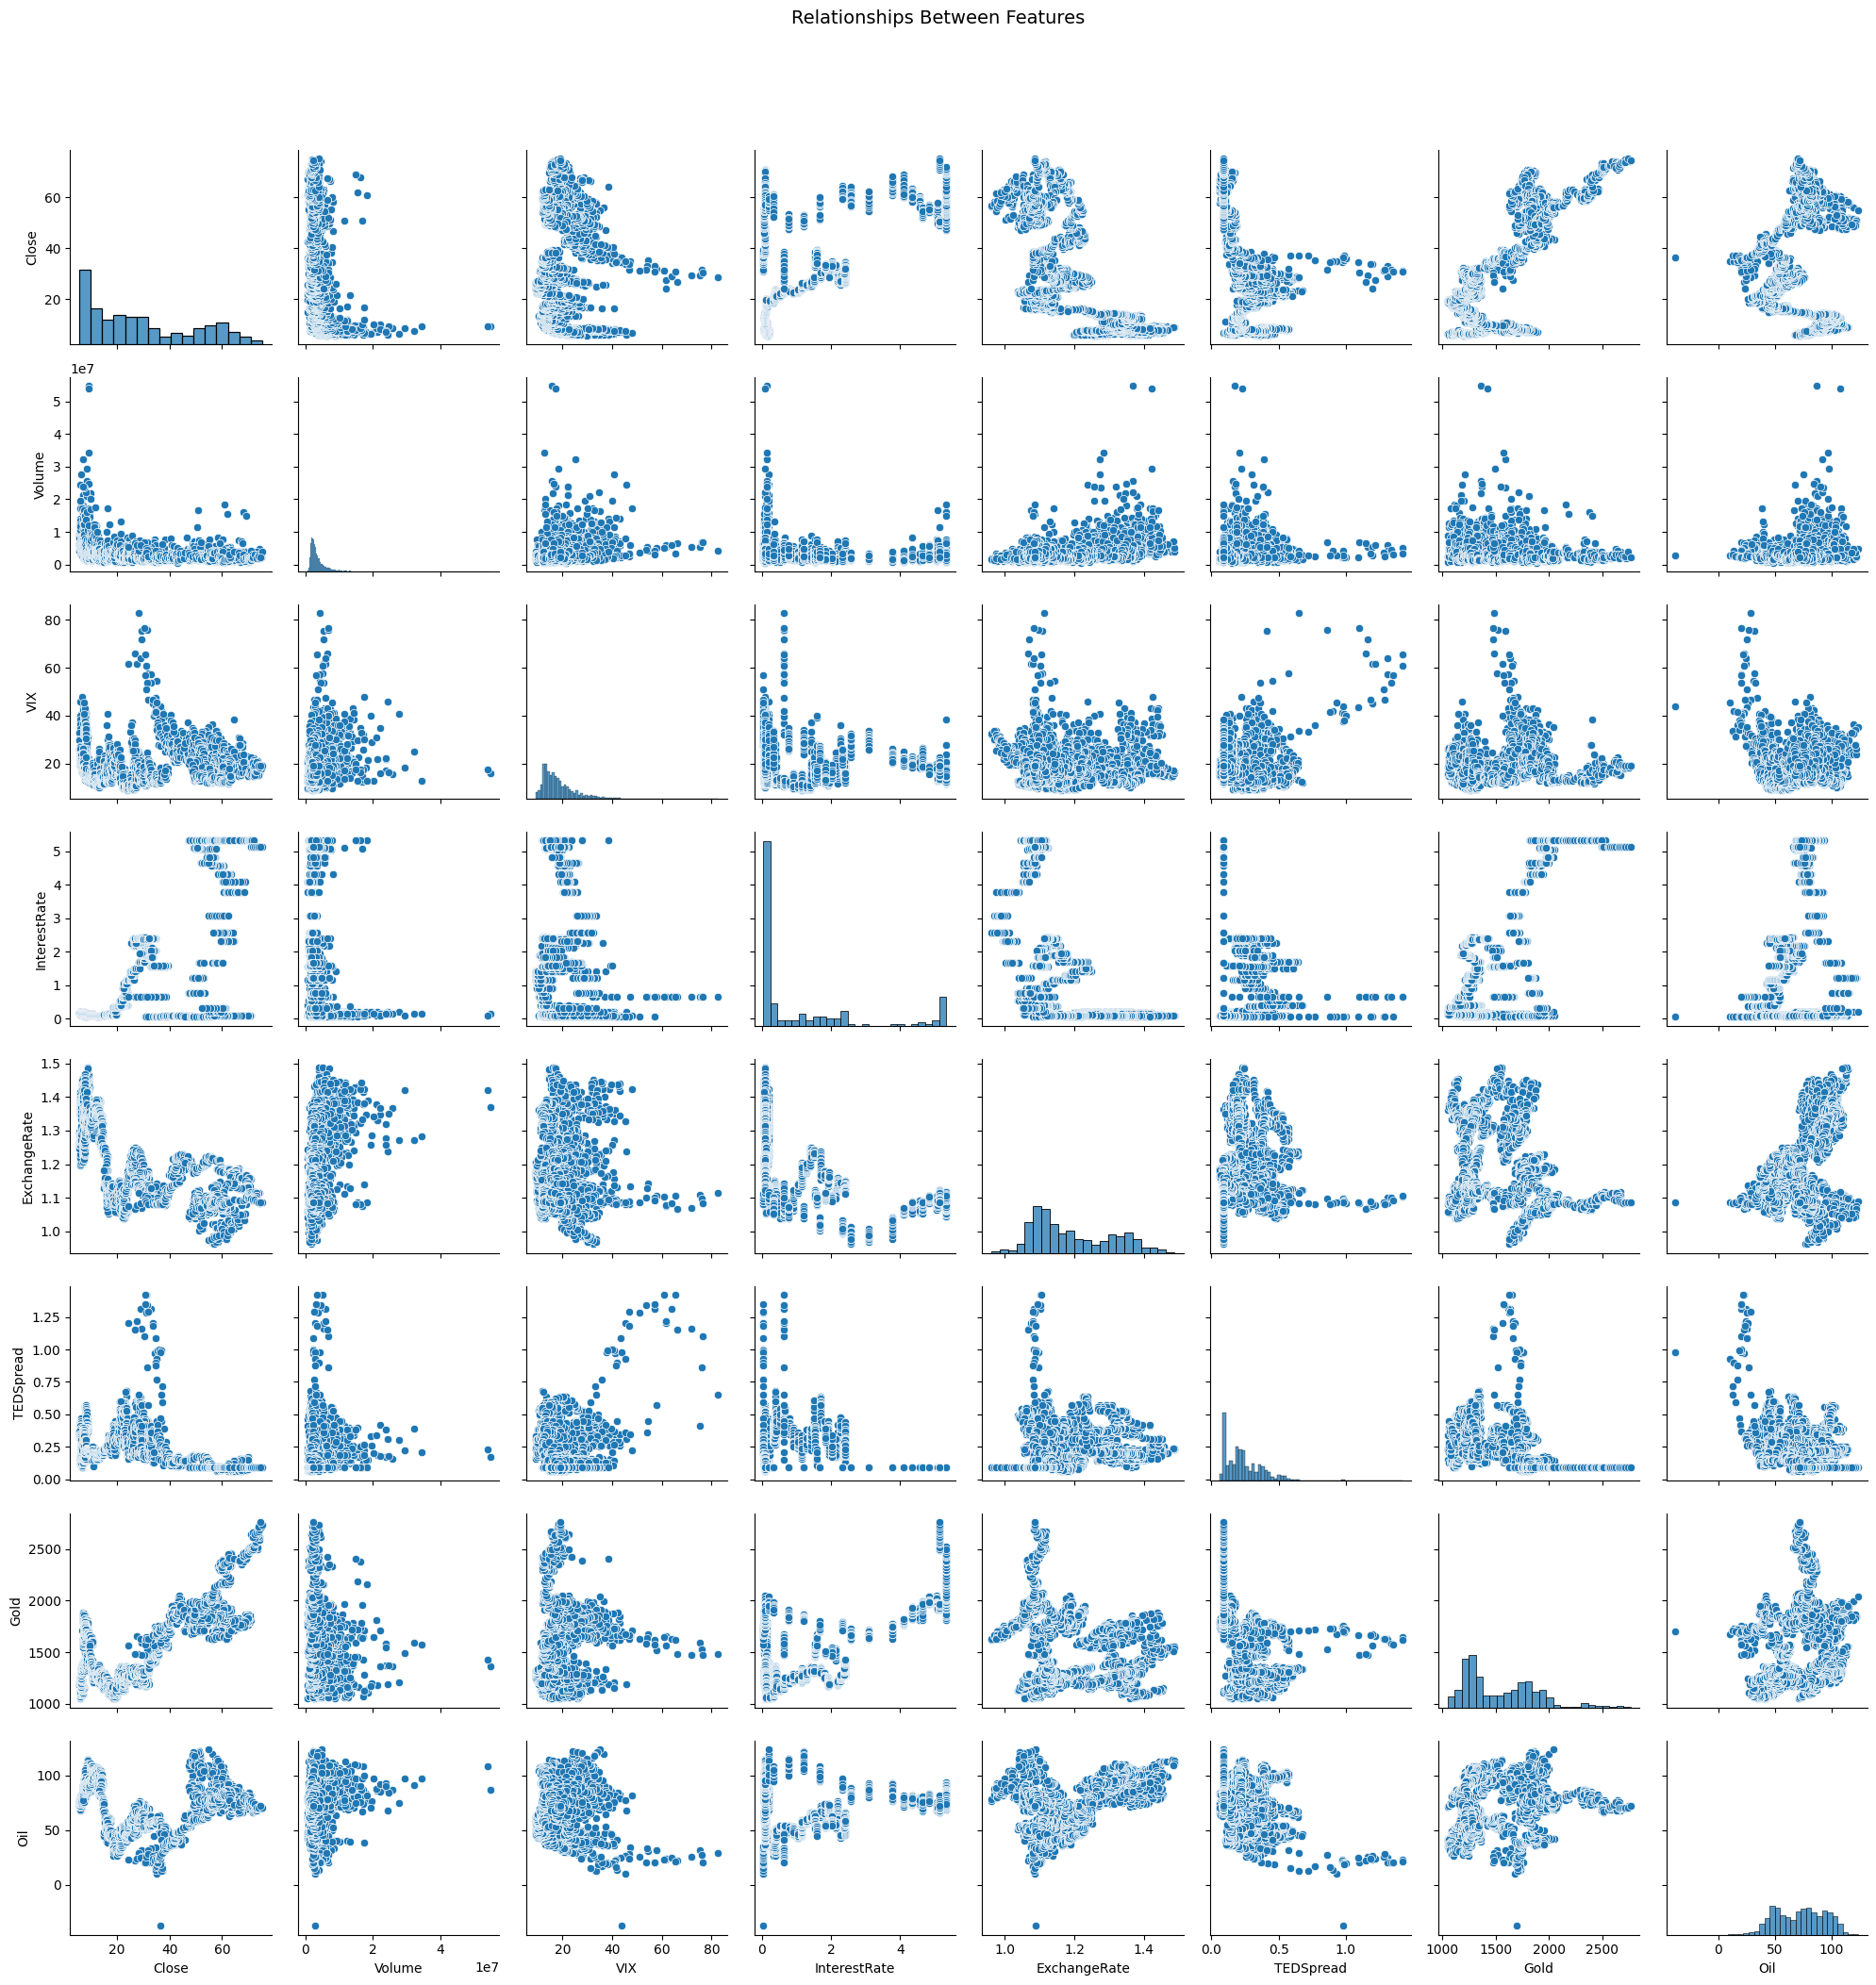

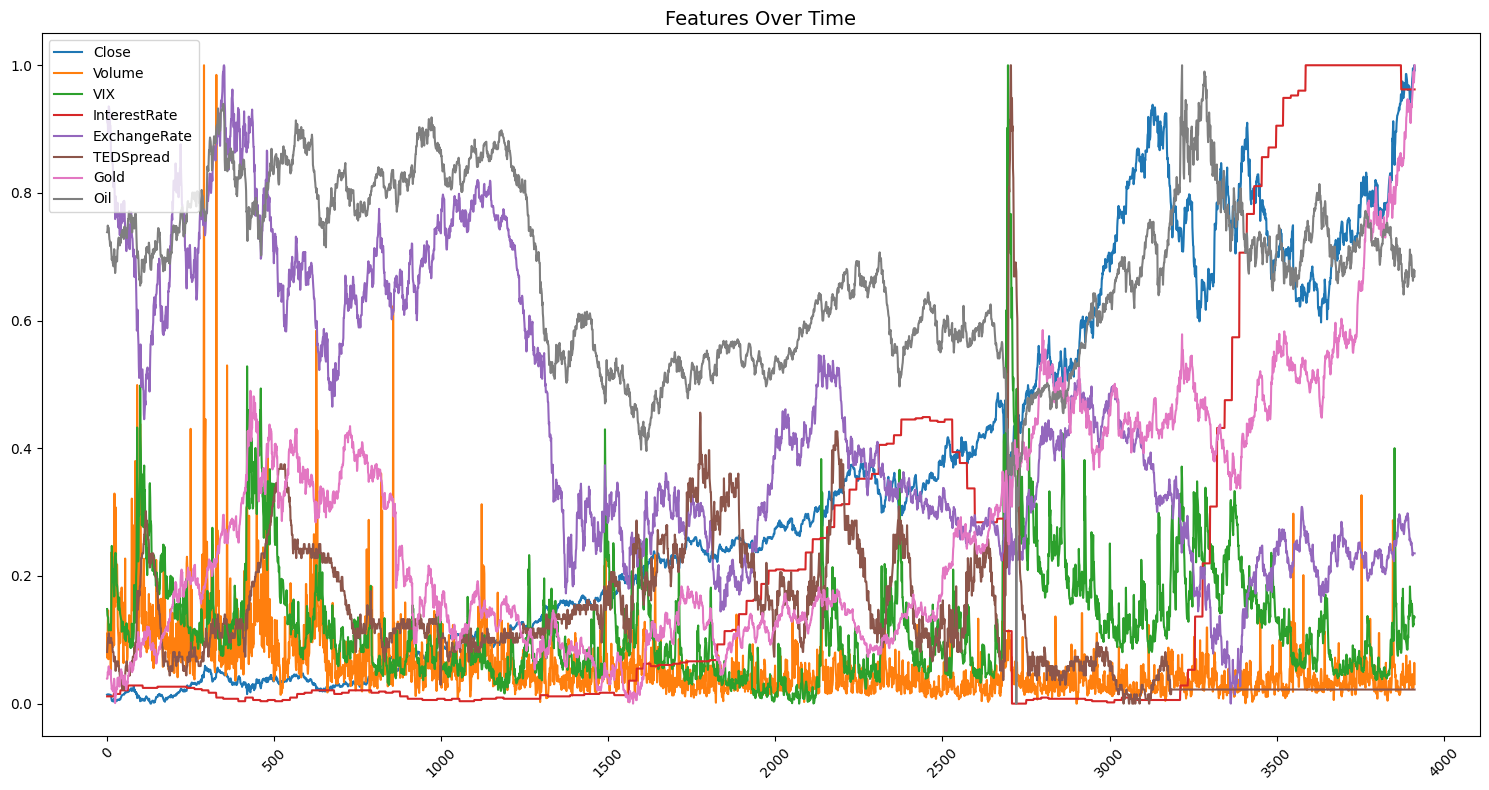

In [67]:
columns = ["Close", "Volume", "VIX", "InterestRate", "ExchangeRate", "TEDSpread", "Gold", "Oil"]

pair_plot = sns.pairplot(nasdaq_df[columns])
pair_plot.figure.suptitle("Relationships Between Features", fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

nasdaq_norm_df = nasdaq_df[columns].copy()

for column in columns:
    nasdaq_norm_df[column] = (nasdaq_df[column] - nasdaq_df[column].min()) / (nasdaq_df[column].max() - nasdaq_df[column].min())

plt.figure(figsize=(15,8))
for col in columns:
    plt.plot(nasdaq_norm_df.index, nasdaq_norm_df[col], label=col, linewidth=1.5)

plt.title("Features Over Time", fontsize=14)
plt.legend(loc="upper left")
plt.xticks(rotation=45)  # Rotate x-axis labels


plt.tight_layout()
plt.show()

The graphs above only further shows how common economic factors have little influence on the stock price. Interest rate seems to have a slight relatonship with gold and oil prices, but just like its relationship with stock prices, I cannot say it was an influence on the prices. However, looking at the graphs, it seems like gold and stock prices seems to share a positive, althought mediocre, relationship. This observation I find not only interesting, but could be useful for during my endeavors in HFT.

### 4. Given one of the 4 FOI, is it possibel to predict its impact on any of the other FOI?

When heading into this analysis, I was optimitic that I would find some form of relationship or pattern between common economic indicators and stock prices. Sadley, after this analysis, it seems like it's not strategically smart to rely on those indicators when trying to predict stock prices, bringing back the saying that you can't beat the market.

## Questions for Hypothesis Testing

1. Is there a statistically significant correlation between trading volume and stock price movements across the dataset?
    - **Hypothesis**: Higher trading volume is associated with larger stock price changes (either increases or decreases).
2. Does the VIX (volatility index) have a significant impact on stock price fluctuations compared to periods of low volatility?
    - **Hypothesis**: Stock prices exhibit greater variability during periods of high VIX values compared to periods of low VIX values.
3. Do changes in interest rates significantly affect the relationship between stock prices and trading volume?
    - **Hypothesis**: The correlation between stock prices and trading volume strengthens or weakens in response to rising interest rates.